In [70]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [71]:
data = pd.read_csv('heart.csv')
print('Shape do dataframe is ', data.shape)

Shape do dataframe is  (303, 14)


In [72]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

A partir dos tipos de dados, vemos que todas as características são int64/float64. Mas isso ocorre porque algumas das características categóricas, incluindo o alvo (tem doença/não tem doença), já estão codificadas por rótulo com label incoding para nós. Veremos, na seção abaixo, uma descrição detalhada das características.

### 1.1 Data Dictionary

**age:** idade em anos

**sex:** sexo  
&nbsp;&nbsp;&nbsp;&nbsp;1 = masculino  
&nbsp;&nbsp;&nbsp;&nbsp;0 = feminino

**cp:** tipo de dor no peito  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 0: angina típica  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 1: angina atípica  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 2: dor não anginosa  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 3: assintomático

**trestbps:** test resting blood pressure / pressão arterial em repouso (em mm Hg na admissão ao hospital)

**col:** colesterol sérico em mg/dl

**fbs:** Fasting Blood Sugar (glicemia de jejum > 120 mg/dl)  
&nbsp;&nbsp;&nbsp;&nbsp;1 = verdadeiro  
&nbsp;&nbsp;&nbsp;&nbsp;0 = falso

**restecg:** resultados eletrocardiográficos em repouso  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 0: normal  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 2: apresentando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

**thalach:** frequência cardíaca máxima alcançada

**exang:** angina induzida por exercício  
&nbsp;&nbsp;&nbsp;&nbsp;1 = sim  
&nbsp;&nbsp;&nbsp;&nbsp;0 = não

**oldpeak:** depressão do segmento ST induzida pelo exercício em relação ao repouso

**Inclinação:** a inclinação do pico do segmento ST durante o exercício  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 0: ascendente  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 1: plano  
&nbsp;&nbsp;&nbsp;&nbsp;Valor 2: descendente

**ca:** número de vasos principais (0–3) coloridos pela fluoroscopia

**thal:**  
&nbsp;&nbsp;&nbsp;&nbsp;0 = erro (no conjunto de dados original, 0 mapeia para NaN’s)  
&nbsp;&nbsp;&nbsp;&nbsp;1 = defeito corrigido  
&nbsp;&nbsp;&nbsp;&nbsp;2 = normal  
&nbsp;&nbsp;&nbsp;&nbsp;3 = defeito reversível

**target (rótulo):**  
&nbsp;&nbsp;&nbsp;&nbsp;0 = sem doença  
&nbsp;&nbsp;&nbsp;&nbsp;1 = doença


In [74]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'O tamanho do dataframe agora é {len(data)} invés de 303')

O tamanho do dataframe agora é 296 invés de 303


### 1.2.2 Rename columns for the sake of clarity 
Os nomes das características no conjunto de dados são abreviados e dificultam a compreensão de seu significado. Um nome médico/técnico completo já é difícil de entender para a maioria de nós, quanto mais sua forma abreviada. <br>
Portanto, para torná-los um pouco mais fáceis de ler, alteraremos, a seguir, os nomes das colunas do quadro de dados usando informações do repositório de dados da UCL. <br>
Também substituiremos as categorias codificadas (0, 1, 2,...) por seus significados médicos ('angina atípica', 'angina típica', etc., por exemplo).

In [75]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [76]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [77]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [78]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### 1.2.3 Agrupando Recursos (por tipo de dado)
Como vimos acima, existem três tipos de dados: object, int e float. Vamos agrupá-los de acordo com o tipo.

In [79]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 1.3 Explorando Características/Alvo 
Nesta seção, investigaremos todas as características (incluindo o alvo) em detalhes. Analisaremos o resumo estatístico, quando possível, e também as distribuições de algumas delas, começando pelo alvo.



### 1.3.1 Distribuição da meta
Observamos que a meta está bastante equilibrada, com ~46% sem doenças cardíacas e ~54% com doenças cardíacas. Portanto, não há necessidade de se preocupar com desequilíbrio da meta.

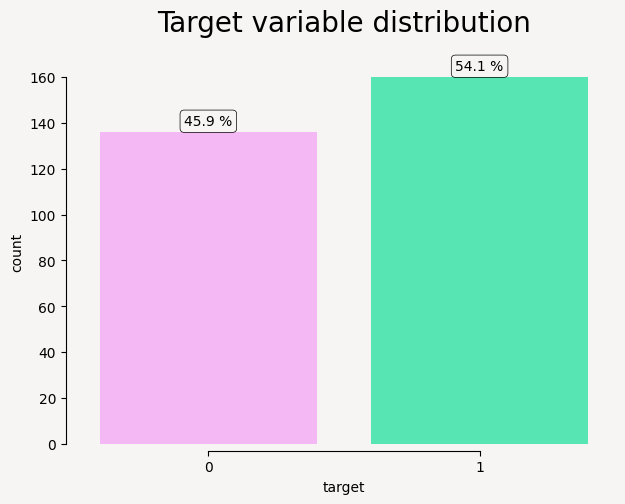

In [80]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 1.3.2 Características Numéricas
Resumo estatístico
Para as características numéricas, podemos aplicar o prático método pandas data.describe() e obter o resumo estatístico global. Os principais números são destacados abaixo.

In [81]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### Estatísticas Descritivas

**Age:**  
&nbsp;&nbsp;&nbsp;&nbsp;A idade média no conjunto de dados é de **54,5 anos**.  
&nbsp;&nbsp;&nbsp;&nbsp;O mais velho tem **77 anos**, enquanto o mais novo tem **29 anos**.

**Cholesterol:**  
&nbsp;&nbsp;&nbsp;&nbsp;O nível médio de colesterol registrado é **247,15 mg/dl**.  
&nbsp;&nbsp;&nbsp;&nbsp;O nível máximo é **564 mg/dl** e o mínimo é **126 mg/dl**.  
&nbsp;&nbsp;&nbsp;&nbsp;**Observação:** De acordo com [6], um nível saudável de colesterol é **< 200 mg/dl**, e geralmente, níveis elevados estão associados a **doenças cardíacas**.

**Resting blood pressure:**  
&nbsp;&nbsp;&nbsp;&nbsp;Média de **131 mm Hg**, máxima de **200 mm Hg** e mínima de **94 mm Hg**.

Max heart rate achieved:**  
&nbsp;&nbsp;&nbsp;&nbsp;A frequência cardíaca máxima média registrada é de **149,5 bpm**.  
&nbsp;&nbsp;&nbsp;&nbsp;O máximo e o mínimo são **202 bpm** e **71 bpm**, respectivamente.

**St_depression:**  
&nbsp;&nbsp;&nbsp;&nbsp;O valor médio de depressão_pad é **1,06**.  
&nbsp;&nbsp;&nbsp;&nbsp;O máximo é **6,2** e o mínimo é **0**.

**Number of major blood vessels:**  
&nbsp;&nbsp;&nbsp;&nbsp;Observa-se um máximo de **3** e um mínimo de **0** vasos sanguíneos principais.  
&nbsp;&nbsp;&nbsp;&nbsp;O valor médio é **0,68**.


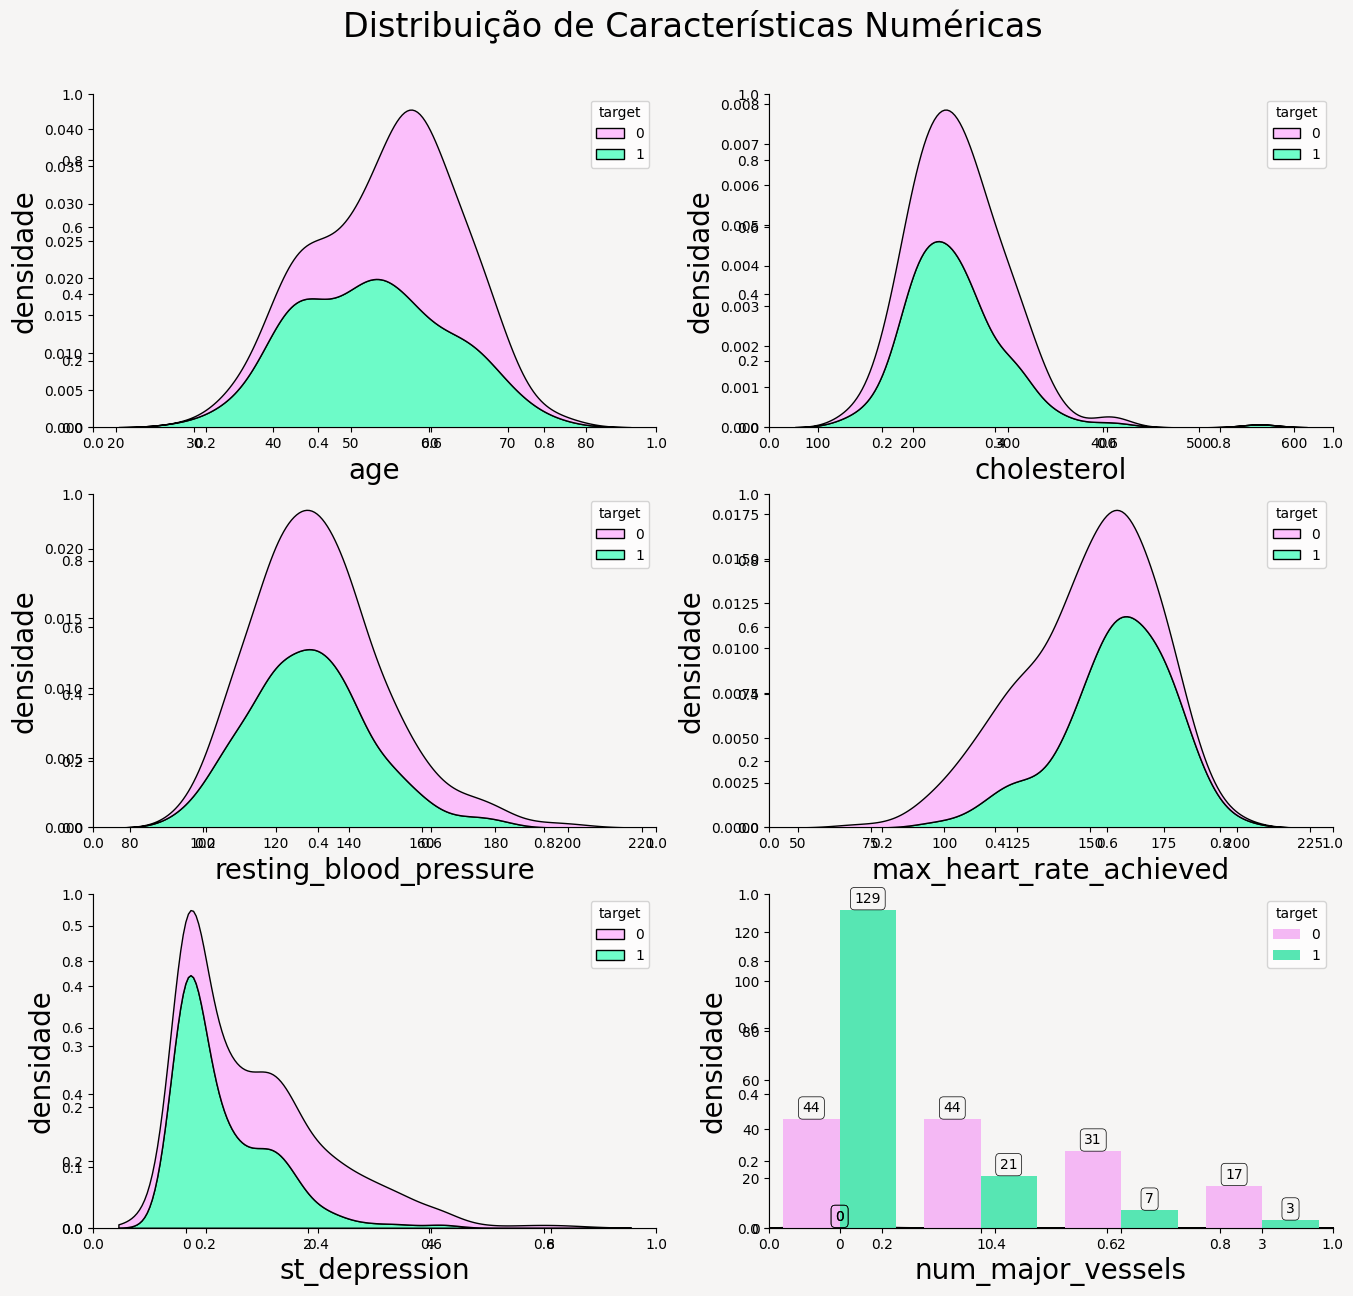

In [82]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("densidade", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribuição de Características Numéricas' ,fontsize = 24);

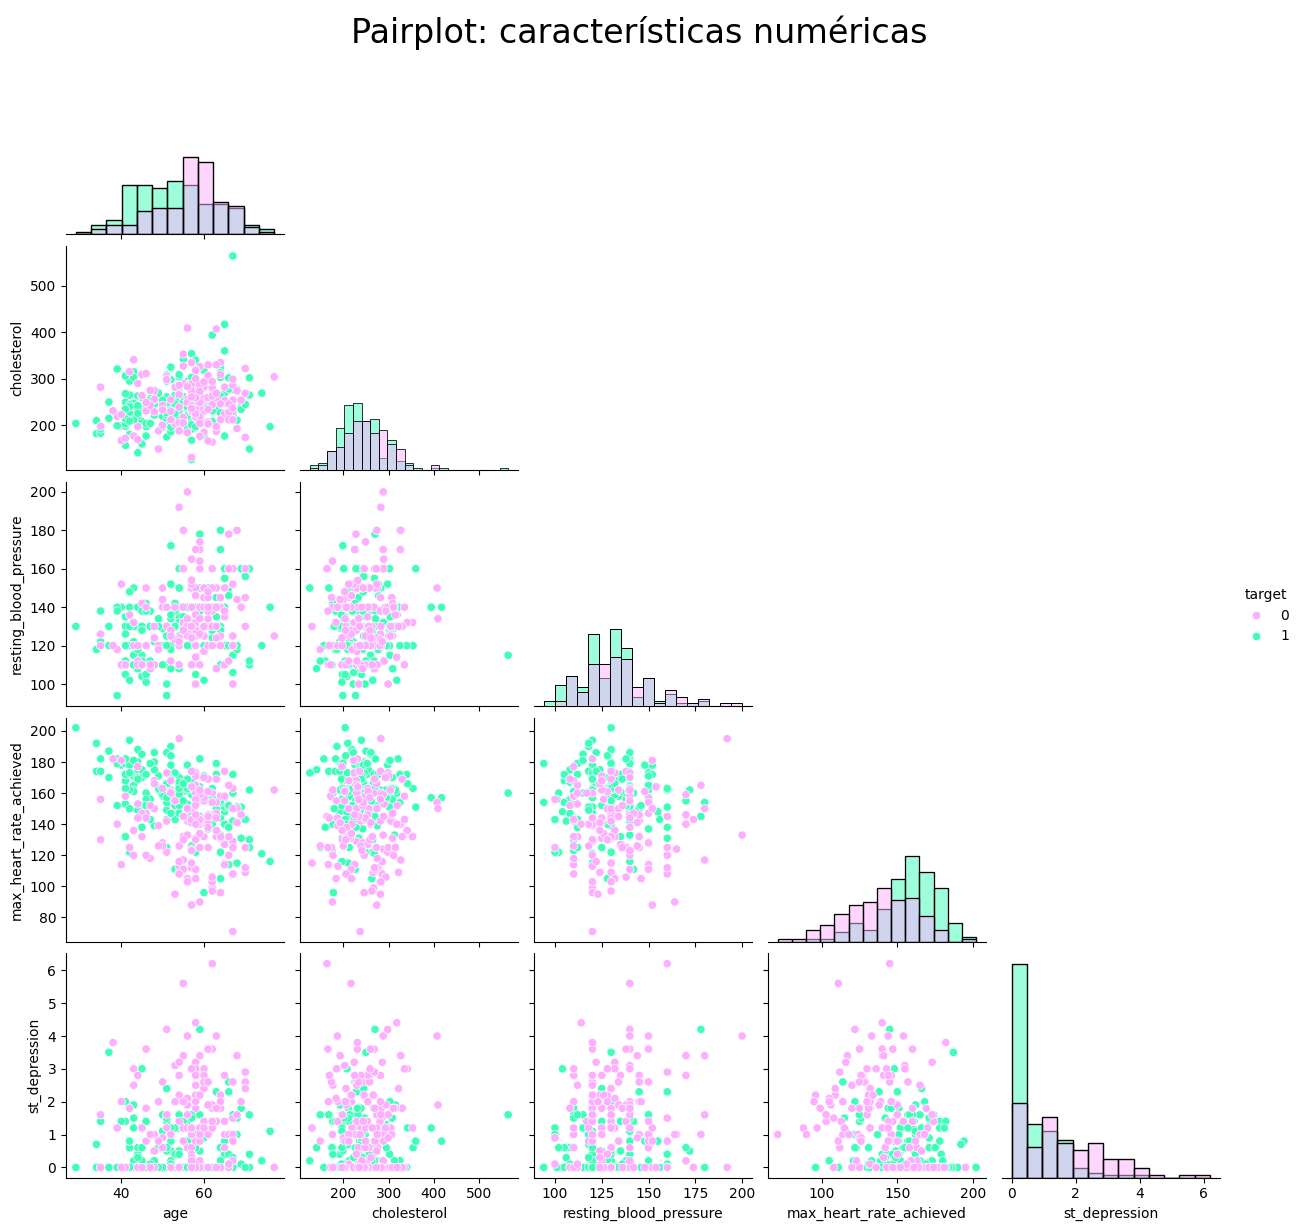

In [83]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: características numéricas ' ,fontsize = 24);

### Características Selecionadas

Abaixo estão gráficos regulares de algumas características selecionadas mostrando a relação linear com a **Idade**, semelhante à primeira coluna do gráfico de pares acima. Observamos que:

- Exceto a **frequência_cardíaca_máxima_atingida**, as demais estão **positiva e linearmente relacionadas com a idade** (embora uma relação mais fraca com a **depressão_st**).  
- **Pacientes mais jovens** com **frequência_cardíaca_máxima_atingida** mais alta têm **maior probabilidade de apresentar problemas cardíacos**.  
- Uma **depressão_st menor**, independentemente da idade, também é **provavelmente um indício de doença cardíaca**.


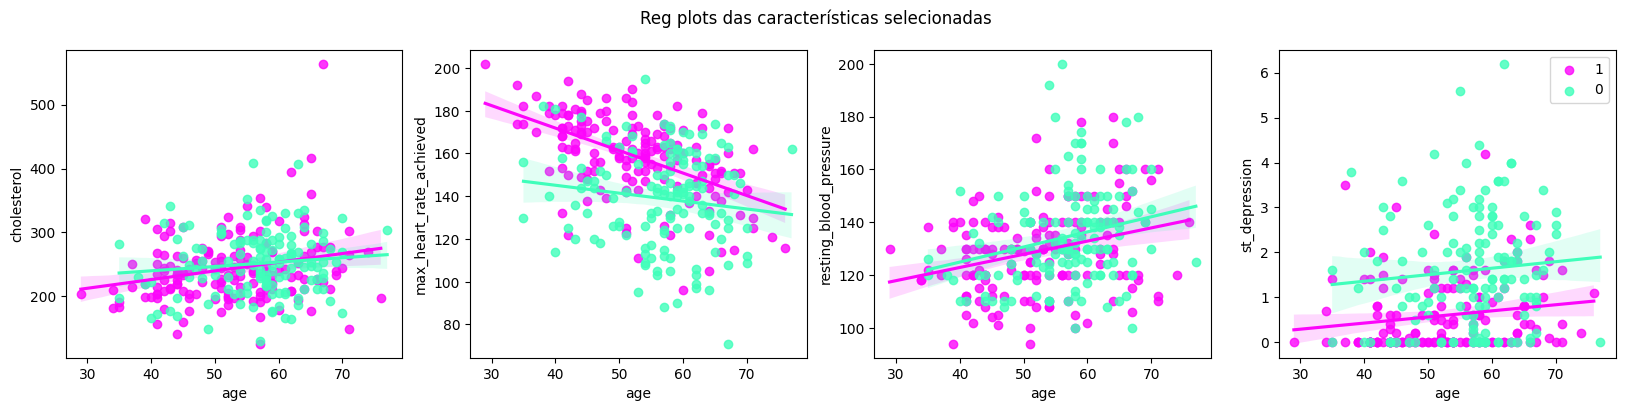

In [84]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots das características selecionadas')
plt.legend();

### 1.3.3 Características Categóricas
Usamos um gráfico de contagem para visualizar as diferentes categorias em relação à variável-alvo. Dois aspectos que podemos observar são a distribuição de cada categoria no conjunto de dados e sua contribuição para a probabilidade de predição correta da variável-alvo, ou seja, tem doença (=1) ou não tem doença (=0). Abaixo está o resumo das características categóricas.

### Análise das Características

**Chest Pain:**  
&nbsp;&nbsp;&nbsp;&nbsp;Mais de **75% dos pacientes** apresentam **dor torácica típica ou não anginosa**.  
&nbsp;&nbsp;&nbsp;&nbsp;Pacientes que apresentaram **angina atípica ou dor torácica não anginosa** têm **maior probabilidade de apresentar doença cardíaca**.

**Resting Electrocardiogram:**  
&nbsp;&nbsp;&nbsp;&nbsp;Pacientes com **hipertrofia ventricular esquerda** são os menos frequentes (~**1,4%**).  
&nbsp;&nbsp;&nbsp;&nbsp;O restante representa uma divisão de quase **50%** entre pacientes com **anormalidade do segmento ST** e aqueles com **testes de REC normais**.  
&nbsp;&nbsp;&nbsp;&nbsp;A **anormalidade do segmento ST** parece ter uma **correlação melhor com o alvo**, ou seja, a maioria dos pacientes com esse tipo de teste de REC **desenvolveu uma doença cardíaca**.

**ST-Slope:**  
&nbsp;&nbsp;&nbsp;&nbsp;A maioria dos pacientes apresenta uma **inclinação do segmento ST descendente ou plana** em seu teste de REC.  
&nbsp;&nbsp;&nbsp;&nbsp;**Inclinações descendentes** são um **forte indício de que o paciente pode ter uma doença cardíaca**.

**Thalassemia:**  
&nbsp;&nbsp;&nbsp;&nbsp;A maioria dos pacientes apresenta um **defeito normal ou reversível**.  
&nbsp;&nbsp;&nbsp;&nbsp;Pacientes com **defeitos de talassemia (reversíveis + fixos)** têm **menor probabilidade de desenvolver doenças cardíacas**.  
&nbsp;&nbsp;&nbsp;&nbsp;Já aqueles com **talassemia normal** têm **maior probabilidade de apresentar problemas cardíacos** — o que **não parece intuitivo**.

**Fasting blood sugar**  
&nbsp;&nbsp;&nbsp;&nbsp;Pacientes com **glicemia em jejum mais baixa (menos de 120 mg/ml)** são a maioria, representando **~85% da amostra**.  
&nbsp;&nbsp;&nbsp;&nbsp;Ter uma **glicemia em repouso mais baixa** tende a **aumentar as chances (~54%)** de desenvolver **doenças cardíacas**.

**Exercise Induced Angina**  
&nbsp;&nbsp;&nbsp;&nbsp;**Dois terços dos pacientes** não apresentaram **angina induzida por exercício**.  
&nbsp;&nbsp;&nbsp;&nbsp;**76%** dos pacientes com **angina induzida por exercício** **não apresentavam problemas cardíacos**.  
&nbsp;&nbsp;&nbsp;&nbsp;Enquanto isso, cerca de **69%** dos pacientes que **não apresentaram angina induzida por exercício** **foram diagnosticados com problemas cardíacos**.

**Sex**  
&nbsp;&nbsp;&nbsp;&nbsp;A maioria dos pacientes é do **sexo masculino**.  
&nbsp;&nbsp;&nbsp;&nbsp;As **mulheres parecem sofrer mais de problemas cardíacos** do que os homens.


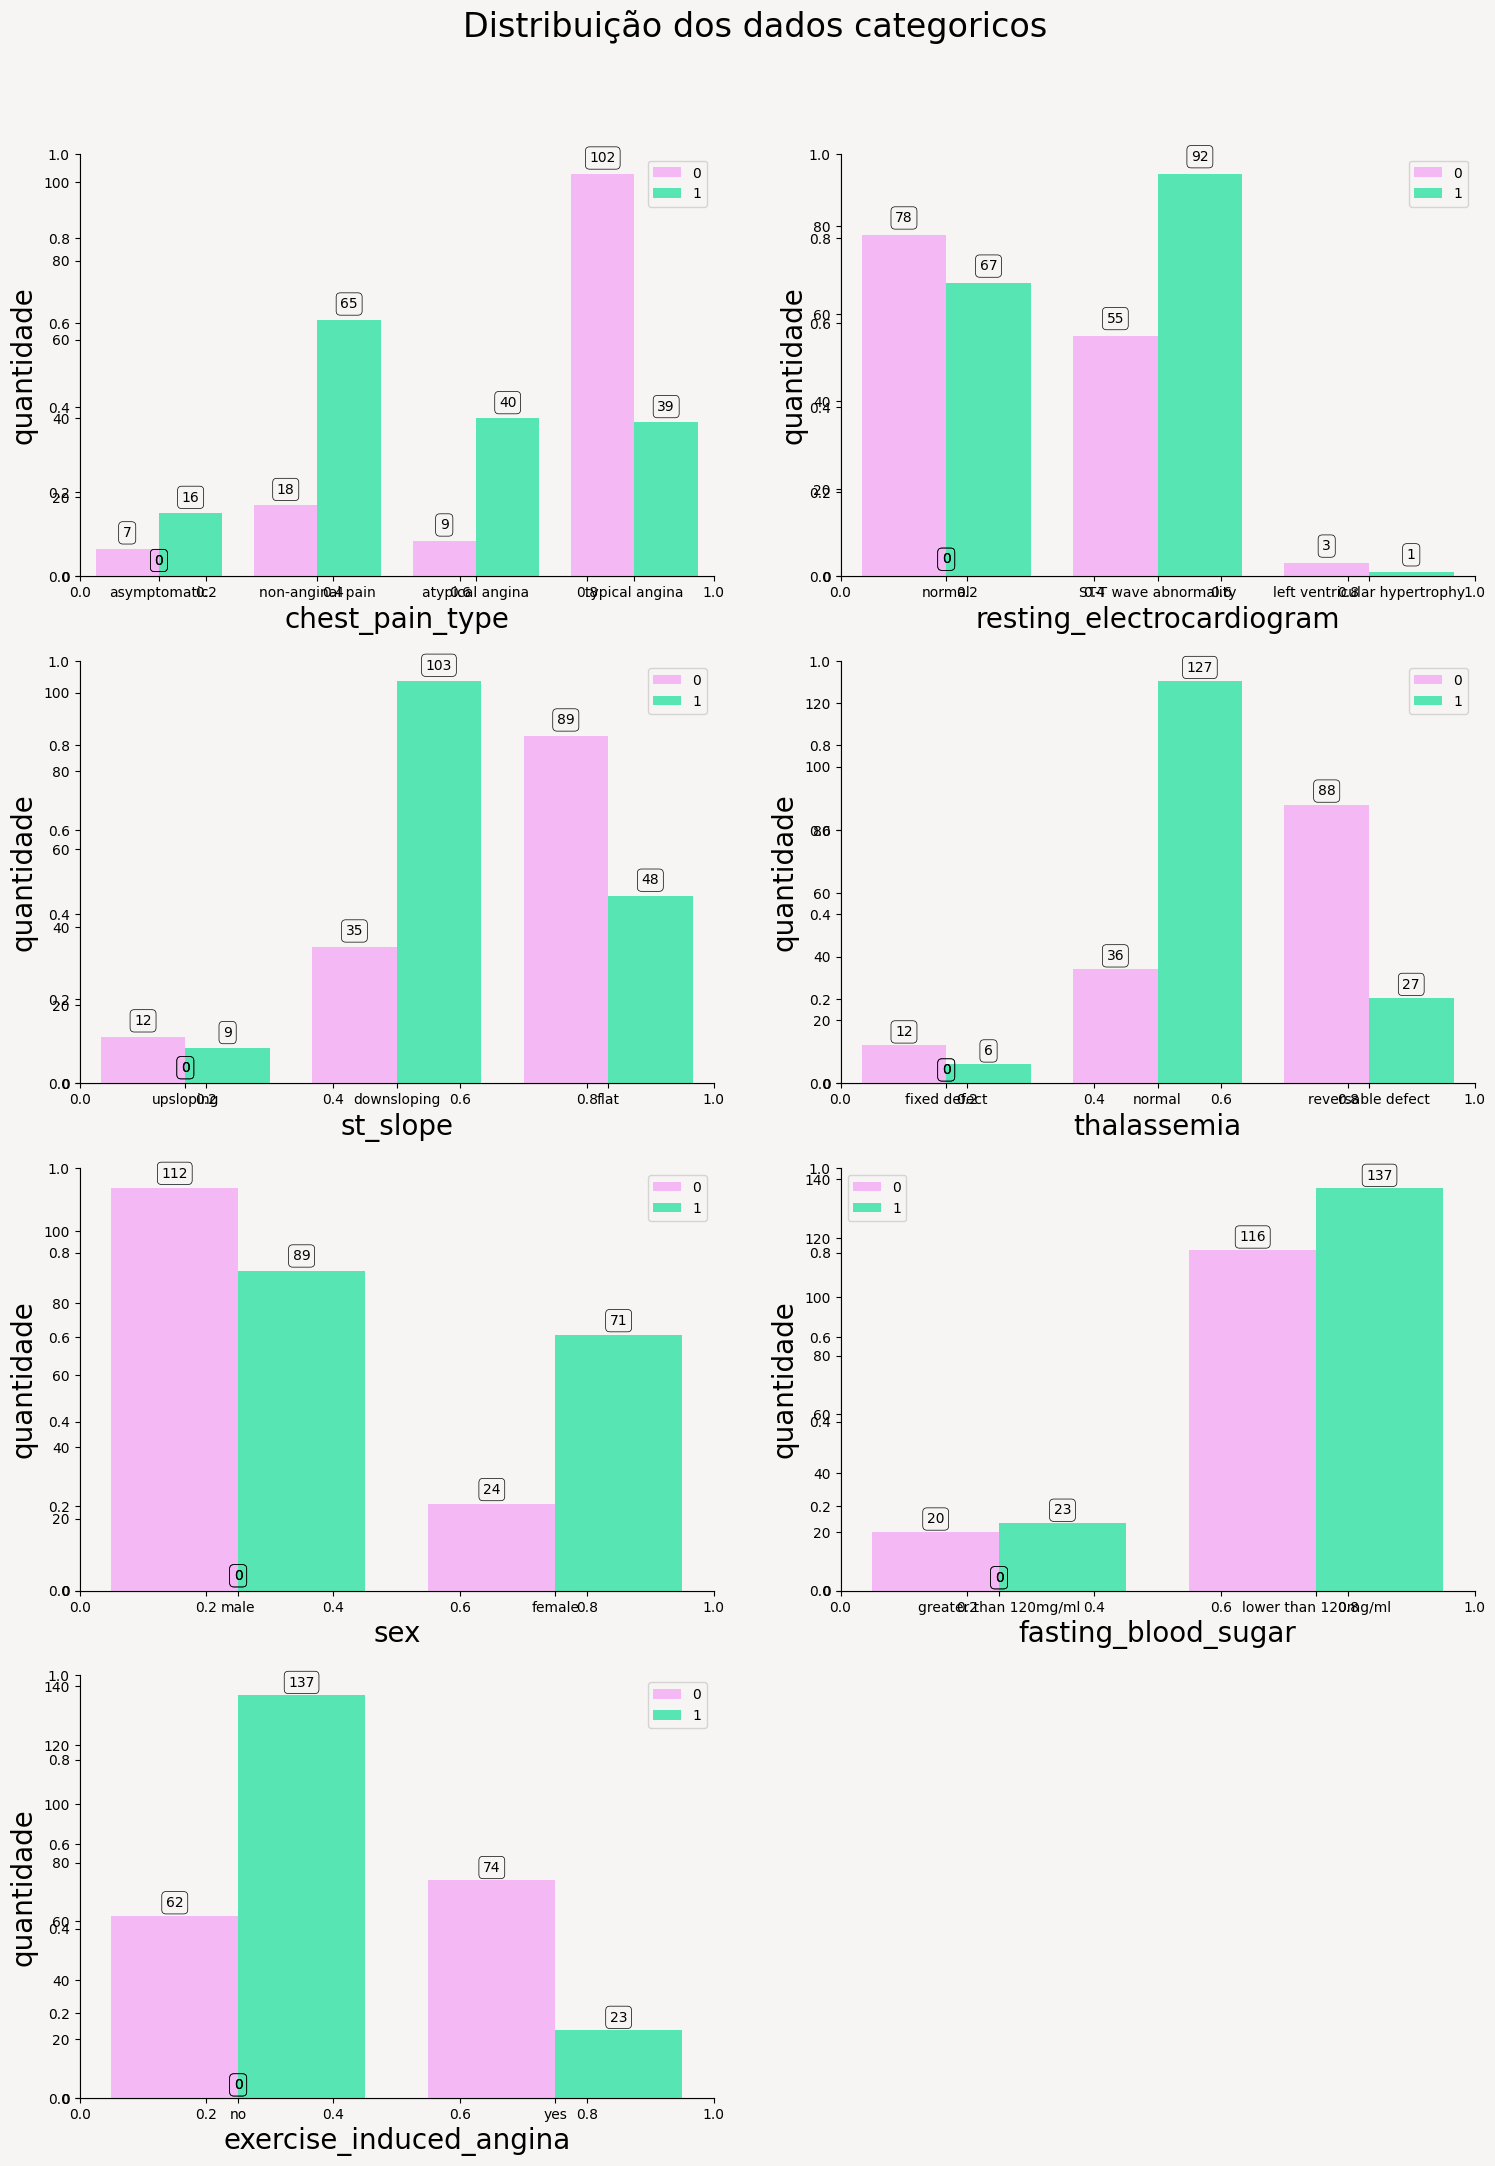

In [85]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("quantidade", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribuição dos dados categoricos' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

## 1.4 Mapas de Calor de Correlação
O mapa de calor de correlação é uma ferramenta útil para representar graficamente como duas feições se relacionam entre si. Dependendo dos tipos de dados das feições, precisamos usar os métodos apropriados de cálculo do coeficiente de correlação. Exemplos são o coeficiente de correlação de Pearson, a correlação bisserial pontual, a correlação V de Cramer, etc.

### 1.4.1 Correlação de Pearson
O coeficiente de correlação de Pearson ― é uma medida de correlação linear entre dois conjuntos de dados. É a razão entre a covariância de duas variáveis ​​e o produto de seus desvios-padrão; portanto, é essencialmente uma medida normalizada da covariância, de modo que o resultado sempre tem um valor entre -1 e 1.

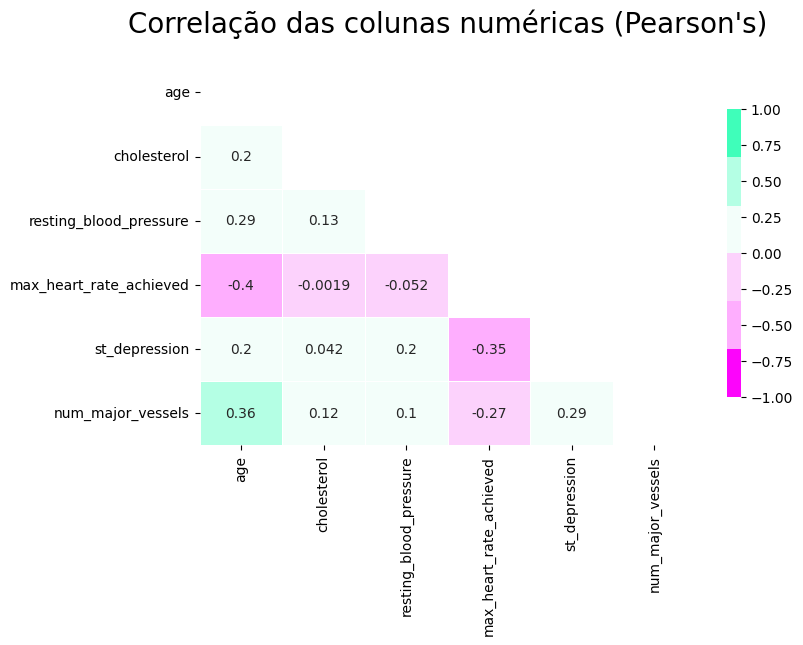

In [86]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Correlação das colunas numéricas (Pearson's)", fontsize=20, y= 1.05);

## 1.4.2 Correlação ponto-bisserial
Uma correlação ponto-bisserial é usada para medir a força e a direção da associação existente entre uma variável contínua e uma variável dicotômica. É um caso especial da correlação produto-momento de Pearson, que é aplicada quando se tem duas variáveis ​​contínuas, enquanto, neste caso, uma das variáveis ​​é medida em uma escala dicotômica.

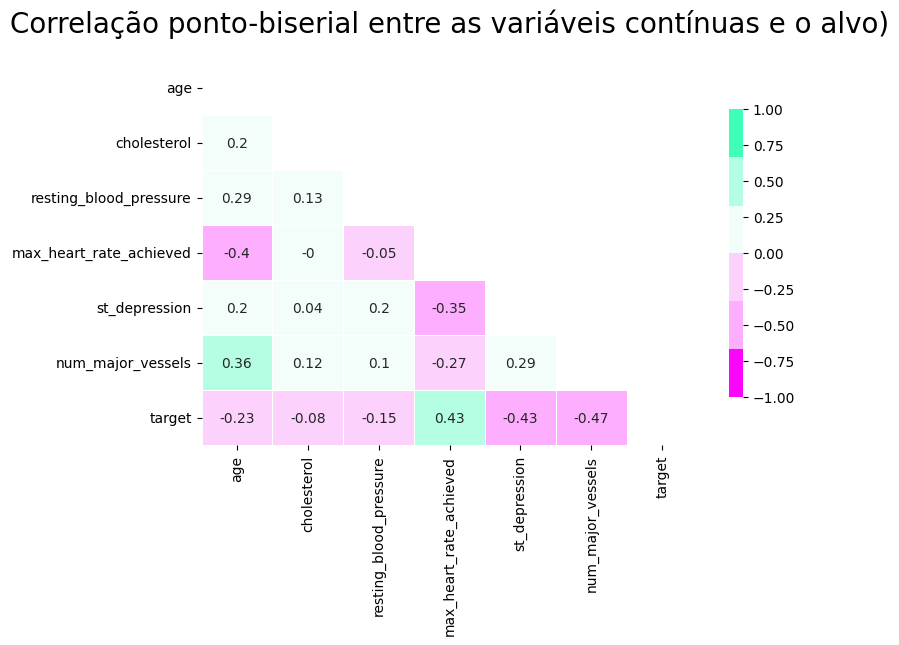

In [87]:
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Correlação ponto-biserial entre as variáveis contínuas e o alvo)", fontsize=20, y= 1.05);


### 1.4.3 Correlação V de Cramer
Em estatística, o V de Cramér é uma medida de associação entre duas variáveis ​​nominais, apresentando um valor entre 0 e +1 (inclusive). Baseia-se na estatística qui-quadrado de Pearson e foi publicado por Harald Cramér em 1946.

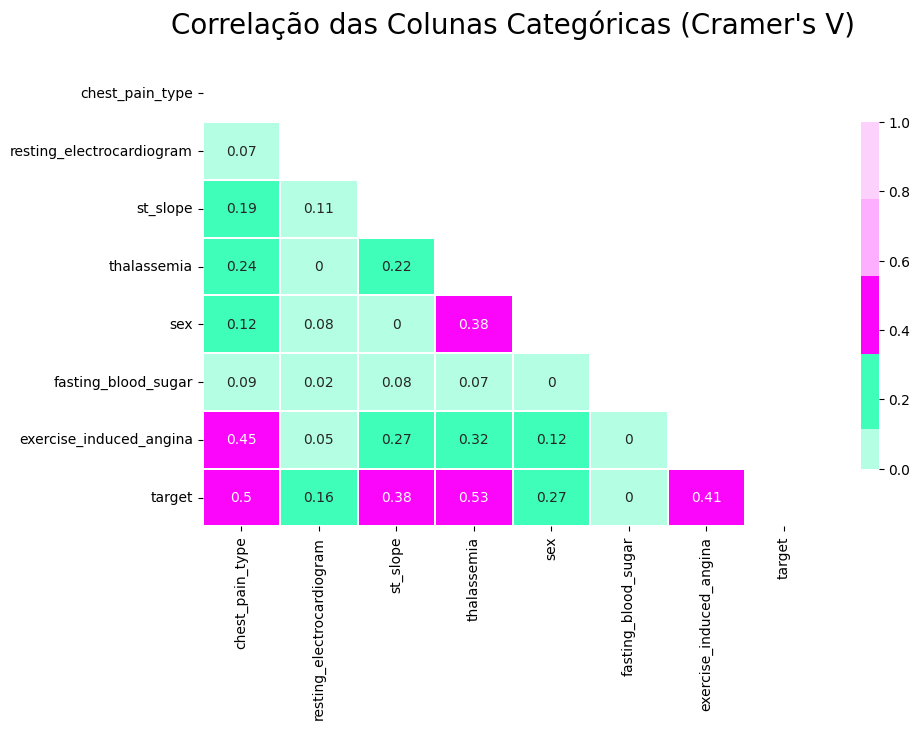

In [88]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Correlação das Colunas Categóricas (Cramer's V)", fontsize=20, y= 1.05);

### 1.5 Resumo da EDA

**Tamanho dos dados:**  
&nbsp;&nbsp;&nbsp;&nbsp;303 linhas e 14 colunas (13 independentes + 1 variável-alvo) — posteriormente **reduzido para 296** após a remoção de pontos de dados incorretos!  
&nbsp;&nbsp;&nbsp;&nbsp;Os dados **não apresentam valores ausentes**.

**Tipo de dados das características (colunas):**  
&nbsp;&nbsp;&nbsp;&nbsp;• Seis características são **numéricas**  
&nbsp;&nbsp;&nbsp;&nbsp;• As demais sete são **categóricas**  
&nbsp;&nbsp;&nbsp;&nbsp;• A **variável-alvo é razoavelmente equilibrada**:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– 54% sem doença  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– 46% com doença

**Correlações:**  
&nbsp;&nbsp;&nbsp;&nbsp;• A correlação entre as características é, na melhor das hipóteses, **fraca**.  
&nbsp;&nbsp;&nbsp;&nbsp;• Entre as variáveis numéricas, **num_major_vessels**, **max_heart_rate_achieved** e **st_depression** apresentam correlação razoável com a variável-alvo, com coeficientes de **-0,47**, **0,43** e **-0,43**, respectivamente.  
&nbsp;&nbsp;&nbsp;&nbsp;• Das variáveis categóricas, **chest_pain_type**, **num_major_vessels**, **thalassemia** e **exercise_induced_angina** apresentam melhor correlação com a variável-alvo, sendo a **thalassemia** a mais alta (**0,52**).  
&nbsp;&nbsp;&nbsp;&nbsp;• O **colesterol** (para minha surpresa, mas o que eu sei?) tem **menor correlação com doenças cardíacas**.

**Conclusão:**  
&nbsp;&nbsp;&nbsp;&nbsp;As características com **maior poder preditivo** podem ser:  
&nbsp;&nbsp;&nbsp;&nbsp;**chest_pain_type**, **num_major_vessels**, **thalassemia**, **exercise_induced_angina**, **max_heart_rate_achieved** e **st_depression**.  
&nbsp;&nbsp;&nbsp;&nbsp;Veremos quais características aparecerão como mais importantes nos **modelos de classificação**.


# 2. Predictions ¶
Note : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms.

### 2.1 2.1 Classificadores do Scikit Learn
Este é um problema de classificação binária (casos com ou sem doença). O Scikit Learn oferece uma ampla gama de algoritmos de classificação e costuma ser o ponto de partida na maioria dos desafios tradicionais de aprendizado de máquina. Portanto, começaremos explorando alguns dos algoritmos de classificação da biblioteca Sklearn, como Regressão Logística, Vizinhos Mais Próximos, Vetores de Suporte, Nu SVC, Árvore de Decisão, Floresta Aleatória, AdaBoost, Reforço de Gradiente, Bayes Naïve, Análise Discriminante Linear, Análise Discriminante Quadrática e Rede Neural. Vamos primeiro construir modelos simples usando os algoritmos de ML mencionados acima e, posteriormente, otimizá-los ajustando os parâmetros.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap 

In [101]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1       
        
    plt.tight_layout() 
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")
        

In [102]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

### 2.1.1 Métrica de desempenho
Existem diversas métricas que podem ser usadas para avaliar o desempenho de um determinado algoritmo de classificação. A escolha das métricas "apropriadas" depende do tipo de problema com o qual estamos lidando. Há casos em que, por exemplo, a precisão pode ser a escolha certa e, em outros casos, uma revocação ou precisão pode ser mais adequada ao propósito. Como estamos lidando com um caso médico (classificar se um caso é positivo para doença cardíaca ou não), poderíamos usar a revocação (taxa de verdadeiros positivos ou sensibilidade) como métricas de desempenho para escolher nosso classificador. Observe aqui que não queremos classificar casos positivos (com doença) como negativos (sem doença).

**Matriz de confusão**: Uma matriz de confusão (também conhecida como matriz de erro) é um layout de tabela específico que permite a visualização do desempenho de um algoritmo de aprendizado supervisionado. Cada linha da matriz representa as instâncias em uma classe real, enquanto cada coluna representa as instâncias em uma classe prevista. A tabela abaixo é um exemplo de uma matriz de confusão para uma classificação binária da qual outras terminologias/métricas podem ser derivadas. Algumas das métricas são descritas abaixo.

| Termo | Significado         | Descrição                                           |
|:------|:--------------------|:----------------------------------------------------|
| TP    | Verdadeiro Positivo | Casos positivos que são previstos como positivos    |
| FP    | Falso Positivo      | Casos negativos que são previstos como positivos    |
| TN    | Verdadeiro Negativo | Casos negativos que são previstos como negativos    |
| FN    | Falso Negativo      | Casos positivos que são previstos como negativos    |


**Acurácea**: mede quantos casos são corretamente identificados/previstos pelo modelo, ou seja, previsão correta dividida pelo tamanho total da amostra.<br>
TP + TN / TP + TN + FP + FN

**Recall**: Mede a taxa de verdadeiros positivos, ou seja, quantos casos positivos reais são identificados/previstos como positivos pelo modelo.<br>
TP / (TP + FN)

**Precisão**: Mede quantos dos casos positivos previstos são realmente positivos.<br>
TP / (TP + FP)                                                                    

**F1-Score**: Combina a precisão e a recuperação do modelo e é definida como a média harmônica da precisão e da recuperação do modelo.<br>
2 * (recall * precisão / recall + precisão)

**Curvas ROC**: Uma curva ROC (Receiver Operating Characteristic) é um gráfico que ilustra o desempenho de um algoritmo de classificação binária como uma função da taxa de falsos positivos e da taxa de falsos positivos.

In [92]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

# A função score_summary corrigida
def score_summary(names, classifiers, X_train, y_train, X_val, y_val):
    
    # Colunas do DataFrame de resultados
    cols = ['Classifier', 'Accuracy', 'ROC_AUC', 'Recall', 'Precision', 'F1']
    
    # 1. Inicializa uma lista para COLETAR os resultados de cada classificador
    results_list = [] 
    
    # Loop pelos classificadores
    for name, classifier in zip(names, classifiers):
        
        # Treinamento e Previsão
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_val)
        
        # Cálculo das Métricas
        accuracy = accuracy_score(y_val, y_pred)
        
        # O roc_auc_score requer as probabilidades (predict_proba)
        # O índice [:, 1] pega as probabilidades da classe positiva (1)
        try:
            roc_auc = roc_auc_score(y_val, classifier.predict_proba(X_val)[:, 1])
        except AttributeError:
            # Caso o classificador não tenha predict_proba (ex: LinearSVC)
            roc_auc = np.nan 

        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        
        # F1 score: 2 * (Recall * Precision) / (Recall + Precision)
        # Proteção contra divisão por zero (ocorre se precision + recall = 0)
        if (recall + precision) == 0:
            f1 = 0.0
        else:
            f1 = 2 * recall * precision / (recall + precision)
            
        # Cria um DataFrame temporário com os resultados do classificador atual
        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        
        # 2. Adiciona o DataFrame de resultados à lista
        results_list.append(df)
        
    # 3. Fora do loop, usa pd.concat para juntar todos os DataFrames da lista
    data_table = pd.concat(results_list, ignore_index=True)
        
    # Retorna o DataFrame final com os valores arredondados
    return(np.round(data_table, 2))


# SEU CÓDIGO DE ESTILIZAÇÃO, AGORA CORRETO
score_summary(names, classifiers, X_train, y_train, X_val, y_val).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,86.490000,0.920000,0.910000,0.820000,0.860000
10,Quadratic DA,85.140000,0.900000,0.830000,0.850000,0.840000
9,Linear DA,85.140000,0.920000,0.890000,0.820000,0.850000
6,AdaBoost,85.140000,0.930000,0.890000,0.820000,0.850000
5,Random Forest,83.780000,0.920000,0.830000,0.830000,0.830000
7,Gradient Boosting,82.430000,0.900000,0.890000,0.780000,0.830000
8,Naive Bayes,82.430000,0.920000,0.860000,0.790000,0.820000
4,Decision Tree,82.430000,0.820000,0.830000,0.810000,0.820000
3,Nu SVC,81.080000,0.910000,0.910000,0.740000,0.820000
11,Neural Net,78.380000,0.880000,0.940000,0.700000,0.800000


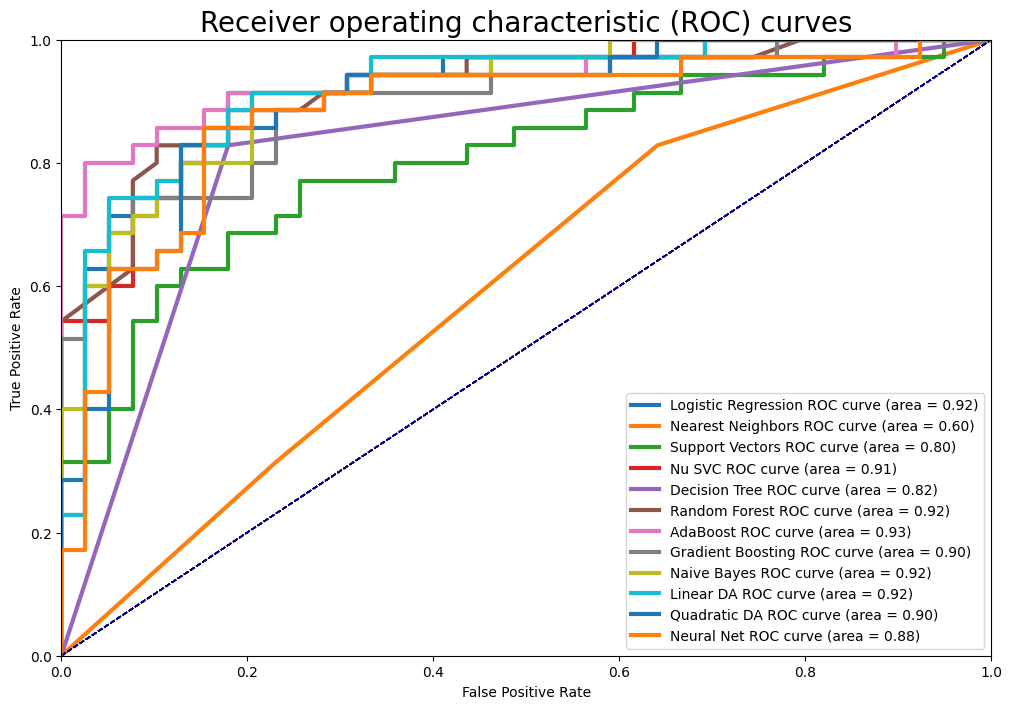

In [93]:
roc_auc_curve(names, classifiers)

Agora que vimos todas as métricas de desempenho dos classificadores, é hora de decidirmos qual o melhor algoritmo de classificação possível. Com base na precisão, o LR ocupa o primeiro lugar (86%); enquanto, se considerarmos a revocação, as Redes Neurais ocupam o primeiro lugar com 94%. No caso da precisão, o QDA ocupa o primeiro lugar com 85%. Então, qual escolher? A pontuação F1 pode nos dar um equilíbrio entre revocação e precisão. O LR possui a melhor pontuação F1, então escolhemos a Regressão Logística como nosso melhor classificador.

Observação: Se eu estivesse consultando uma clínica que realiza um teste de triagem para doenças cardíacas, gostaria de encontrar um equilíbrio perfeito entre precisão e revocação (não quero que a clínica arrisque sua reputação divulgando muitos resultados falso-positivos, mas sem arriscar a saúde de seus clientes ao prever muitos falsos negativos). Portanto, eu os aconselharia a escolher o modelo que fornece uma pontuação F1 mais alta, ou seja, o modelo de regressão logística.

### 2.1.5 Ajuste de Parâmetros (RandomizedSearch): LogisticRegression
Então, escolhemos nosso melhor classificador, o modelo de regressão logística. No entanto, isso foi alcançado com parâmetros padrão. A intuição é que poderíamos melhorar ainda mais nosso modelo com parâmetros ajustados. Vamos ver se conseguimos isso usando o algoritmo RandomizedSearch do scikit-learn.

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': np.float64(0.2835648865872159), 'penalty': 'l2', 'solver': 'liblinear'}


In [95]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



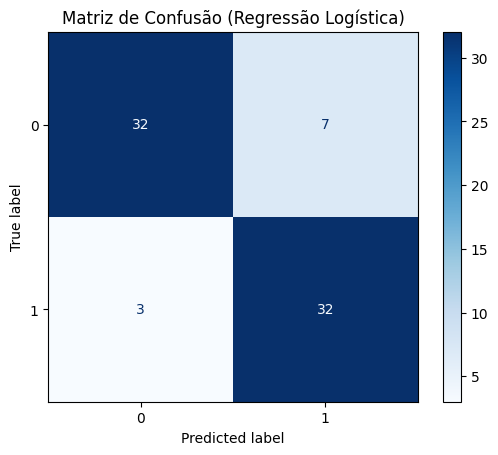

In [96]:
# Importações necessárias (rode estas linhas primeiro, se ainda não o fez)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Comando de plotagem corrigido:
# O método from_estimator recebe o modelo (lr) e os dados (X_val, y_val)
disp = ConfusionMatrixDisplay.from_estimator(
    lr,          # Seu modelo treinado
    X_val,       # Dados de validação
    y_val,       # Rótulos verdadeiros
    cmap=plt.cm.Blues, # Define um mapa de cores
    normalize=None     # Ou 'true', 'pred', 'all' se quiser normalizar
)

# Adiciona um título e exibe o plot
disp.ax_.set_title("Matriz de Confusão (Regressão Logística)")
plt.show()

## 2.2 Catboost, Lgbm e Xgboost
Na seção acima (&&2.1), vimos classificadores da biblioteca scikit-learn. Agora, testaremos os algoritmos de ML modernos (árvores impulsionadas), como catboost, xgboost e lgbm. Eles são algoritmos de aprendizado de máquina otimizados com base na técnica de aumento de gradiente. Dependendo do problema em questão, um algoritmo pode ser mais adequado do que outros.

In [97]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

In [98]:
score_summary(names_boost, classifiers, X_train, y_train, X_val, y_val)\
.sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Catboost,83.780000,0.920000,0.860000,0.810000,0.830000
2,light GBM,82.430000,0.910000,0.860000,0.790000,0.820000
1,xgbbost,79.730000,0.910000,0.830000,0.760000,0.790000


In [99]:
plot_conf_matrix(
    names=names_boost,
    classifiers=classifiers,
    X_train=X_train,  # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    y_train=y_train,  # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    X_val=X_val,      # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    y_val=y_val,      # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    nrows=1, 
    ncols=3, 
    fig_a=12, 
    fig_b=3
)


TypeError: plot_conf_matrix() got an unexpected keyword argument 'X_train'

In [ ]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120], 
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1), 
                           param_grid=rs_params, 
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [ ]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120], 
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1), 
                           param_grid=rs_params, 
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [109]:
lgbm = LGBMClassifier(**params);

lgbm.fit(X_train, y_train, 
        eval_set=(X_val, y_val)
);

print(classification_report(y_val, lgbm.predict(X_val)))

[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

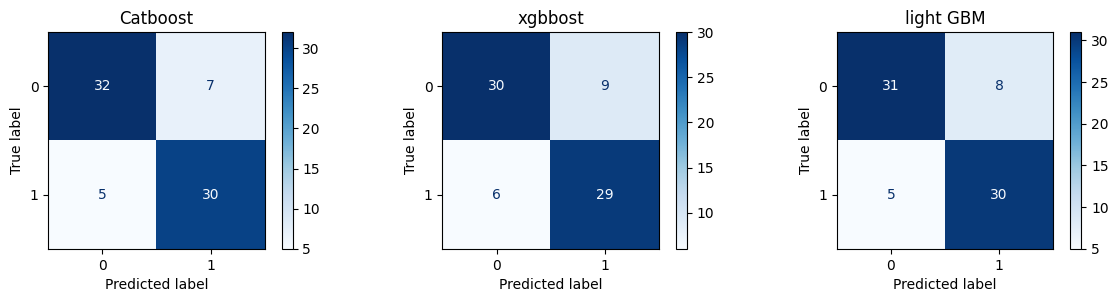

In [ ]:
plot_conf_matrix(
    names=names_boost,
    classifiers=classifiers,
    X_train=X_train,  # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    y_train=y_train,  # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    X_val=X_val,      # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    y_val=y_val,      # <--- ARGUMENTO OBRIGATÓRIO ADICIONADO
    nrows=1, 
    ncols=3, 
    fig_a=12, 
    fig_b=3
);

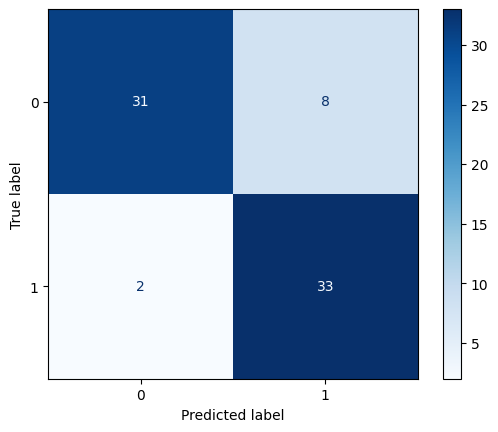

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# A chamada corrigida usa ConfusionMatrixDisplay.from_estimator
ConfusionMatrixDisplay.from_estimator(
    lgbm,          # Seu modelo LightGBM treinado
    X_val,         # Dados de validação
    y_val,         # Rótulos verdadeiros
    cmap=plt.cm.Blues,
    # Você pode adicionar um título ou rótulos, se quiser
)

plt.show()

Observação: Neste caso (Lgbm), o ajuste de hiperparâmetros produziu resultados melhores do que o modelo base. Aumentamos o valor de recall de 86% para 94%. O que significa que reduzimos a taxa de falsos negativos de 5 para 2 casos em nosso conjunto de validação e também reduzimos os casos de falsos positivos em 1. É marginal, mas usaremos cada ponto percentual possível.

## 2.3 Explicabilidade do Modelo 
Um dos desafios de um projeto de aprendizado de máquina é explicar a previsão do modelo. Um modelo pode considerar algumas características mais importantes do que outras para sua previsão. Outro modelo pode considerar outras características como mais importantes. A importância da permutação e o SHAP são dois métodos que podem ser usados ​​para entender quais características foram selecionadas para ter o maior impacto na previsão do nosso modelo.

### 2.3.1 Importância da permutação:
A importância da permutação é definida como a diminuição na pontuação de um modelo quando um único valor de característica é embaralhado aleatoriamente. O procedimento quebra a relação entre a característica e o alvo, portanto, a queda na pontuação do modelo é indicativa de quanto o modelo depende da característica. Em outras palavras, a importância da permutação nos diz quais características têm o maior impacto em nossas previsões do modelo.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

Weight,Feature
0.0901 ± 0.0127,num_major_vessels
0.0730 ± 0.0276,chest_pain_type
0.0288 ± 0.0340,st_slope
0.0099 ± 0.0175,max_heart_rate_achieved
0.0054 ± 0.0067,st_depression
0 ± 0.0000,exercise_induced_angina
0 ± 0.0000,thalassemia
0 ± 0.0000,fasting_blood_sugar
0 ± 0.0000,resting_electrocardiogram
0 ± 0.0000,sex


### 2.3.2 SHAP:
SHAP, abreviação de SHapely Additive ExPlanations, é um método usado para explicar a saída de um modelo de aprendizado de máquina. Ele conecta a alocação ótima de crédito com explicações locais usando os valores clássicos de Shapley da teoria dos jogos e suas extensões relacionadas [5]. O SHAP possui uma rica funcionalidade (métodos) com a qual podemos visualizar/interpretar a saída de nossos modelos. Abaixo, usamos shap.summary_plot() para identificar o impacto de cada recurso na saída prevista.

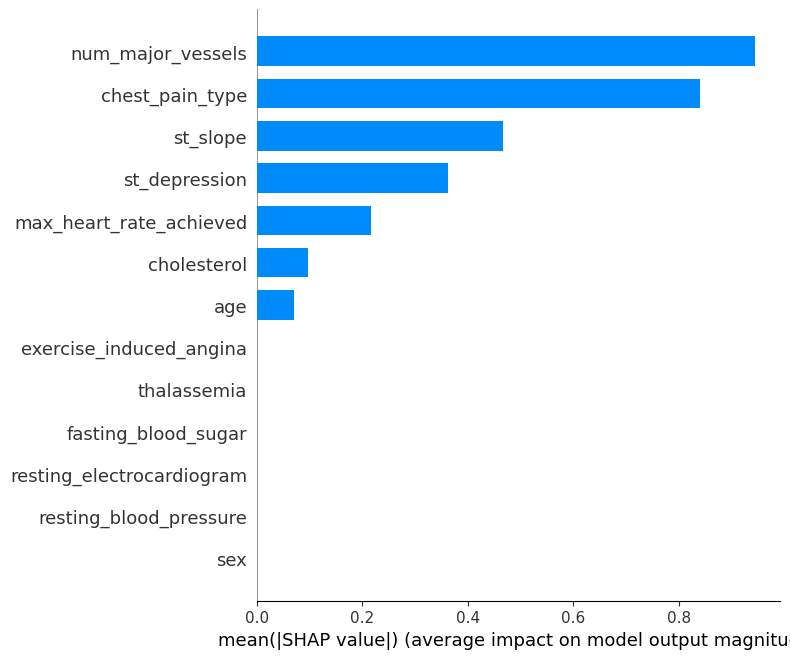

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, 
                  feature_names=features, 
                  plot_type="bar",
                 )

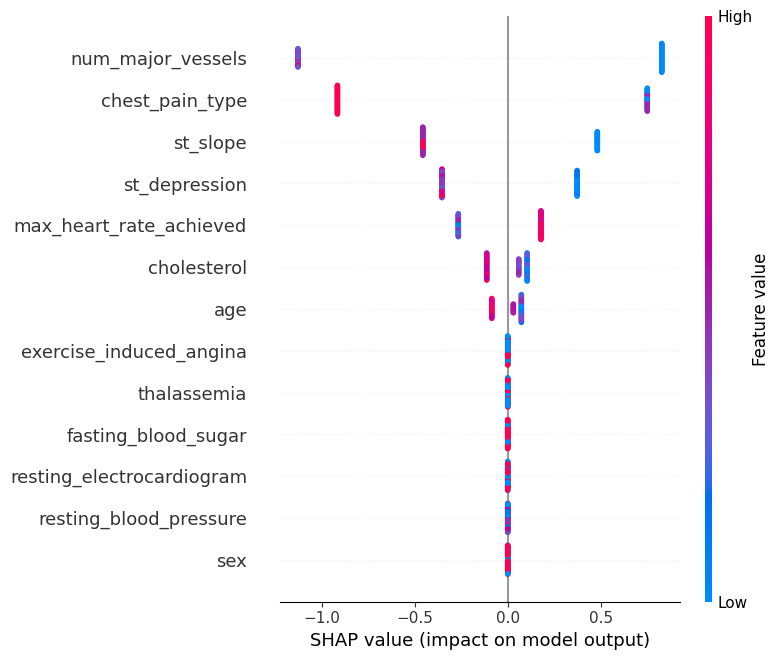

In [ ]:
# Para modelos de regressão, geralmente shap_values é 2D
shap.summary_plot(shap_values, X_val)

#3. Considerações Finais

No início deste notebook, definimos o que queríamos fazer com este projeto: explorar o **conjunto de dados de doenças cardíacas (EDA)** e praticar a **classificação binária (modelagem)**.  

Na primeira parte (**EDA**), exploramos o conjunto de dados, realizamos uma **verificação de integridade** e removemos alguns dados "defeituosos", além de outros pré-processamentos. Também tentamos identificar a **correlação entre as características** e com a **variável-alvo**.  

Na segunda parte, praticamos como configurar **classificadores binários**; começando com **modelos base** e, finalmente, chegando ao **melhor modelo** por meio do **ajuste de hiperparâmetros**. Alguns dos destaques estão resumidos abaixo:

- Nosso **melhor modelo** é o classificador **LGBM** (ajustado com `RandomizedSearch`).  
- De acordo com a **importância da permutação (eli5)** e o **SHAP**, as três características mais importantes do modelo são:  
  1. `num_major_vessels`  
  2. `chest_pain_type`  
  3. `st_slope`  
  Essas características também estão entre as mais bem correlacionadas no **EDA**.  
- Ao contrário da intuição, o **colesterol** não é um recurso importante para o modelo (nem `eli5` nem `SHAP` o consideraram relevante).  
- Embora não seja mostrado neste caderno, a **variação da proporção teste/treinamento** resultou em **métricas de desempenho diferentes** para os classificadores da nossa lista. Portanto, alterar a proporção pode gerar **resultados diferentes**.


In [ ]:
import joblib
from sklearn.metrics import accuracy_score

# 1. ASSUME QUE 'lgbm' É O SEU MODELO TREINADO
# O seu modelo deve estar definido e treinado (ex: LGBMClassifier().fit(X_train, y_train))
modelo_final = lgbm 

# 2. CALCULA E IMPRIME A PRECISÃO
# Certifique-se de que X_val e y_val estão definidos
y_pred = modelo_final.predict(X_val)
precisao = accuracy_score(y_val, y_pred) * 100

print(f"Precisão do Modelo (na base de validação): {precisao:.2f}%")
print("-" * 50)


# 3. SALVA O MODELO NO DISCO
nome_arquivo = 'modelo_classificacao_doenca_cardiaca.pkl'

joblib.dump(modelo_final, nome_arquivo)

print(f"Modelo salvo com sucesso para uso em aplicação fullstack como: {nome_arquivo}")

Precisão do Modelo (na base de validação): 86.49%
--------------------------------------------------
Modelo salvo com sucesso para uso em aplicação fullstack como: modelo_classificacao_doenca_cardiaca.pkl


In [ ]:
import pandas as pd

# Lista que você está usando na sua API (Mantenha esta lista como está para comparação!)
MODEL_COLUMNS_API = [
    "age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiogram", 
    "max_heart_rate_achieved", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"
]

try:
    # Tenta extrair a lista de features que o modelo LGBM realmente usou
    # Tenta o método 1: Atributo do scikit-learn wrapper
    if hasattr(lgbm, 'feature_name_'):
        colunas_modelo_lgbm = list(lgbm.feature_name_)
    # Tenta o método 2: Acesso ao booster interno (mais robusto)
    elif hasattr(lgbm, 'booster_'):
        colunas_modelo_lgbm = list(lgbm.booster_.feature_name())
    else:
        # Se for um modelo que passou por GridSearchCV/RandomizedSearchCV
        colunas_modelo_lgbm = list(lgbm.best_estimator_.feature_name_)


    print("--- NOMES DE FEATURES USADOS PELO MODELO LGBM ---")
    print(colunas_modelo_lgbm)
    print("-" * 50)
    
    
    # 3. Faz a comparação detalhada
    print("\n--- DETALHES DA CONFERÊNCIA ---")
    
    if len(MODEL_COLUMNS_API) != len(colunas_modelo_lgbm):
        print(f"ERRO DE TAMANHO: Sua lista tem {len(MODEL_COLUMNS_API)} colunas, o modelo usou {len(colunas_modelo_lgbm)}.")
        print("A lista da API PRECISA ter o mesmo número de colunas.")
    else:
        diferencas = [
            (i + 1, api_col, model_col)
            for i, (api_col, model_col) in enumerate(zip(MODEL_COLUMNS_API, colunas_modelo_lgbm))
            if api_col != model_col
        ]
        
        if not diferencas:
            print("SUCESSO: A ordem e os nomes são IDÊNTICOS!")
        else:
            print(f"ERRO DE NOME: Foram encontradas {len(diferencas)} divergências de nomes/ordem:")
            print("| Posição | Nome na API | Nome no Modelo |")
            print("|---------|-------------|----------------|")
            for pos, api_col, model_col in diferencas:
                print(f"| {pos:^7} | {api_col:<11} | {model_col:<14} |")
                
except Exception as e:
    print(f"ERRO: Não foi possível acessar as features do modelo 'lgbm'. Detalhes: {e}")
    print("\nSUGESTÃO: Se você usou um DataFrame 'X_train' para treinar, use a lista de colunas dele:")
    print("list(X_train.columns)")

--- NOMES DE FEATURES USADOS PELO MODELO LGBM ---
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
--------------------------------------------------

--- DETALHES DA CONFERÊNCIA ---
SUCESSO: A ordem e os nomes são IDÊNTICOS!


In [ ]:
# 1. Mostrar as primeiras 5 linhas para ver a codificação e os valores
print("--- Primeiros 5 Registros de Treinamento (X_train.head()) ---")
print("Verifique se as colunas categóricas (como 'fasting_blood_sugar' ou 'fbs') estão em 0/1 (codificado) ou têm valores altos (raw).")
print(X_train.head().to_markdown(index=False))

--- Primeiros 5 Registros de Treinamento (X_train.head()) ---
Verifique se as colunas categóricas (como 'fasting_blood_sugar' ou 'fbs') estão em 0/1 (codificado) ou têm valores altos (raw).
|   age |   sex |   chest_pain_type |   resting_blood_pressure |   cholesterol |   fasting_blood_sugar |   resting_electrocardiogram |   max_heart_rate_achieved |   exercise_induced_angina |   st_depression |   st_slope |   num_major_vessels |   thalassemia |
|------:|------:|------------------:|-------------------------:|--------------:|----------------------:|----------------------------:|--------------------------:|--------------------------:|----------------:|-----------:|--------------------:|--------------:|
|    55 |     0 |                 1 |                      132 |           342 |                     1 |                           0 |                       166 |                         0 |             1.2 |          0 |                   0 |             1 |
|    48 |     1 |             

In [ ]:
valores_unicos_por_coluna = df.apply(lambda x: x.unique())

print("--- Valores Únicos para Cada Coluna ---")
print(valores_unicos_por_coluna)

--- Valores Únicos para Cada Coluna ---
chest_pain_type               [1.0, 0.07, 0.19, 0.24, 0.12, 0.09, 0.45, 0.5]
resting_electrocardiogram     [0.07, 1.0, 0.11, 0.0, 0.08, 0.02, 0.05, 0.16]
st_slope                      [0.19, 0.11, 1.0, 0.22, 0.0, 0.08, 0.27, 0.38]
thalassemia                   [0.24, 0.0, 0.22, 1.0, 0.38, 0.07, 0.32, 0.53]
sex                                      [0.12, 0.08, 0.0, 0.38, 0.99, 0.27]
fasting_blood_sugar                      [0.09, 0.02, 0.08, 0.07, 0.0, 0.99]
exercise_induced_angina      [0.45, 0.05, 0.27, 0.32, 0.12, 0.0, 0.99, 0.41]
target                        [0.5, 0.16, 0.38, 0.53, 0.27, 0.0, 0.41, 0.99]
dtype: object


In [ ]:
import pandas as pd

try:
    # 1. Mostrar as primeiras 5 linhas
    print("--- Primeiros 5 Registros de Treinamento (X_train.head()) ---")
    print(X_train.head().to_markdown(index=False))

    print("\n--- Tipos de Dados (X_train.info()) ---")
    # 2. Mostrar os tipos de dados para confirmar se são float ou int
    X_train.info()

    print("\n--- Estatísticas (Média e Desvio Padrão) ---")
    # 3. Mostrar média e DP para identificar padronização (Média ~0, DP ~1)
    print(X_train.describe().T[['mean', 'std', 'min', 'max']].to_markdown(numalign="left", stralign="left"))


except NameError:
    print("ERRO: A variável 'X_train' não está definida. ")
    print("Substitua 'X_train' pelo nome correto do seu DataFrame de treino (ex: X_treino, X_final).")
except Exception as e:
    print(f"Ocorreu um erro ao inspecionar o DataFrame: {e}")

--- Primeiros 5 Registros de Treinamento (X_train.head()) ---
|   age |   sex |   chest_pain_type |   resting_blood_pressure |   cholesterol |   fasting_blood_sugar |   resting_electrocardiogram |   max_heart_rate_achieved |   exercise_induced_angina |   st_depression |   st_slope |   num_major_vessels |   thalassemia |
|------:|------:|------------------:|-------------------------:|--------------:|----------------------:|----------------------------:|--------------------------:|--------------------------:|----------------:|-----------:|--------------------:|--------------:|
|    55 |     0 |                 1 |                      132 |           342 |                     1 |                           0 |                       166 |                         0 |             1.2 |          0 |                   0 |             1 |
|    48 |     1 |                 2 |                      124 |           255 |                     0 |                           0 |                       1

In [100]:
import pandas as pd

try:
    print("--- VALORES ÚNICOS EM CADA COLUNA DO X_train ---")
    
    # Itera sobre cada coluna do DataFrame X_train
    for column in X_train.columns:
        # Usa value_counts() para uma visão mais detalhada (conta e ordena)
        # O método unique() é mais rápido, mas value_counts() dá o contexto de frequência
        
        # Se o número de valores únicos for pequeno (<= 20), imprima todos
        if X_train[column].nunique() <= 20:
            print(f"\nCol: {column} (Total Únicos: {X_train[column].nunique()}):")
            print(X_train[column].value_counts().sort_index().index.tolist()) # Imprime a lista ordenada de valores
        else:
            # Se for contínuo/padronizado, imprima min/max
            print(f"\nCol: {column} (Contínuo/Padronizado, Total Únicos: {X_train[column].nunique()}):")
            print(f"Min: {X_train[column].min():.4f}, Max: {X_train[column].max():.4f}, Média: {X_train[column].mean():.4f}")
            
except NameError:
    print("ERRO: A variável 'X_train' não está definida. Certifique-se de que a variável foi criada corretamente.")
except Exception as e:
    print(f"Ocorreu um erro ao inspecionar X_train: {e}")

--- VALORES ÚNICOS EM CADA COLUNA DO X_train ---

Col: age (Contínuo/Padronizado, Total Únicos: 40):
Min: 29.0000, Max: 76.0000, Média: 54.7117

Col: sex (Total Únicos: 2):
[0, 1]

Col: chest_pain_type (Total Únicos: 4):
[0, 1, 2, 3]

Col: resting_blood_pressure (Contínuo/Padronizado, Total Únicos: 43):
Min: 94.0000, Max: 192.0000, Média: 130.7523

Col: cholesterol (Contínuo/Padronizado, Total Únicos: 137):
Min: 126.0000, Max: 564.0000, Média: 247.7072

Col: fasting_blood_sugar (Total Únicos: 2):
[0, 1]

Col: resting_electrocardiogram (Total Únicos: 3):
[0, 1, 2]

Col: max_heart_rate_achieved (Contínuo/Padronizado, Total Únicos: 83):
Min: 71.0000, Max: 202.0000, Média: 150.2793

Col: exercise_induced_angina (Total Únicos: 2):
[0, 1]

Col: st_depression (Contínuo/Padronizado, Total Únicos: 38):
Min: 0.0000, Max: 6.2000, Média: 1.0189

Col: st_slope (Total Únicos: 3):
[0, 1, 2]

Col: num_major_vessels (Total Únicos: 4):
[0, 1, 2, 3]

Col: thalassemia (Total Únicos: 3):
[0, 1, 2]


In [103]:
import pandas as pd

# 1. FAZER PREVISÕES E COMBINAR COM OS DADOS
try:
    # Fazer a previsão no conjunto de validação
    y_pred_lgbm = lgbm.predict(X_val)
    
    # Criar um DataFrame combinado (features + rótulo verdadeiro + previsão)
    df_resultados = X_val.copy()
    df_resultados['target_real'] = y_val
    df_resultados['prediction'] = y_pred_lgbm

    # 2. ENCONTRAR UM REGISTRO QUE DEU 1 (DOENÇA PRESENTE)
    # Busca um registro que o modelo previu corretamente (prediction=1 E target_real=1)
    registro_doenca = df_resultados[
        (df_resultados['prediction'] == 1) & (df_resultados['target_real'] == 1)
    ].head(1) # Pega apenas o primeiro registro encontrado

    # 3. ENCONTRAR UM REGISTRO QUE DEU 0 (DOENÇA AUSENTE)
    # Busca um registro que o modelo previu corretamente (prediction=0 E target_real=0)
    registro_saudavel = df_resultados[
        (df_resultados['prediction'] == 0) & (df_resultados['target_real'] == 0)
    ].head(1) # Pega apenas o primeiro registro encontrado

    
    print("--- REGISTRO PARA REPRODUZIR CLASSE 1 (DOENÇA) ---")
    if not registro_doenca.empty:
        # Remove as colunas de resultado para ficar só com as features de entrada
        dados_1 = registro_doenca.drop(columns=['target_real', 'prediction']).iloc[0].to_dict()
        print("\nCOLE ESTE DICIONÁRIO NO SEU TESTE DE API/FRONTEND:")
        print(dados_1)
        print("\nVerificação: Este registro deve resultar em CLASSE 1 (Risco Alto).")
    else:
        print("Aviso: Não foi encontrado nenhum registro que o modelo previu como 1 corretamente.")


    print("\n\n--- REGISTRO PARA REPRODUZIR CLASSE 0 (SAUDÁVEL) ---")
    if not registro_saudavel.empty:
        # Remove as colunas de resultado para ficar só com as features de entrada
        dados_0 = registro_saudavel.drop(columns=['target_real', 'prediction']).iloc[0].to_dict()
        print("\nCOLE ESTE DICIONÁRIO NO SEU TESTE DE API/FRONTEND:")
        print(dados_0)
        print("\nVerificação: Este registro deve resultar em CLASSE 0 (Risco Baixo).")
    else:
        print("Aviso: Não foi encontrado nenhum registro que o modelo previu como 0 corretamente.")


except NameError:
    print("ERRO: As variáveis 'lgbm', 'X_val', ou 'y_val' não estão definidas. Verifique os nomes das suas variáveis de treino/teste.")
except Exception as e:
    print(f"Ocorreu um erro ao processar os dados: {e}")

ERRO: As variáveis 'lgbm', 'X_val', ou 'y_val' não estão definidas. Verifique os nomes das suas variáveis de treino/teste.


In [111]:
import pandas as pd
import numpy as np

# AVISO: Substitua 'lgbm', 'X_val' e 'y_val' pelos nomes reais
# das suas variáveis, se forem diferentes.

try:
    # 1. Fazer as previsões no conjunto de validação
    y_pred_lgbm = lgbm.predict(X_val)
    
    # 2. Criar um DataFrame combinado para análise
    df_resultados = X_val.copy()
    # Adicionamos a classe real (y_val) e a previsão (y_pred) para filtragem
    df_resultados['target_real'] = y_val
    df_resultados['prediction'] = y_pred_lgbm

    # 3. ENCONTRAR REGISTRO DE ALTO RISCO (CLASSE 1)
    # Condição: Previsão é 1 E a resposta real também é 1 (acerto)
    registro_doenca = df_resultados[
        (df_resultados['prediction'] == 1) & (df_resultados['target_real'] == 1)
    ].head(1) 

    # 4. ENCONTRAR REGISTRO DE BAIXO RISCO (CLASSE 0)
    # Condição: Previsão é 0 E a resposta real também é 0 (acerto)
    registro_saudavel = df_resultados[
        (df_resultados['prediction'] == 0) & (df_resultados['target_real'] == 0)
    ].head(1)
    
    print("\n" + "="*50)
    
    # 5. IMPRIMIR REGISTRO DA CLASSE 1 (DOENÇA PRESENTE)
    if not registro_doenca.empty:
        # Pega a primeira linha e a converte para dicionário, eliminando target/prediction
        dados_1 = registro_doenca.drop(columns=['target_real', 'prediction']).iloc[0].to_dict()
        
        # Converte valores para float, que é o tipo esperado pelo FastAPI/Pydantic
        dados_1 = {k: float(v) for k, v in dados_1.items()}
        
        print("REGISTRO DE TESTE - ALTO RISCO (CLASSE 1)")
        print("-" * 50)
        print("Preencha o formulário do frontend com estes valores:")
        print(dados_1)
        print("\nEste registro DEVE resultar em: 'Doença Cardiáca Presente'")
    else:
        print("AVISO: Não foi encontrado um registro que o modelo previu como 1 corretamente.")

    print("\n" + "="*50)

    # 6. IMPRIMIR REGISTRO DA CLASSE 0 (DOENÇA AUSENTE)
    if not registro_saudavel.empty:
        dados_0 = registro_saudavel.drop(columns=['target_real', 'prediction']).iloc[0].to_dict()
        dados_0 = {k: float(v) for k, v in dados_0.items()}
        
        print("REGISTRO DE TESTE - BAIXO RISCO (CLASSE 0)")
        print("-" * 50)
        print("Preencha o formulário do frontend com estes valores:")
        print(dados_0)
        print("\nEste registro DEVE resultar em: 'Doença Cardiáca Ausente'")
    else:
        print("AVISO: Não foi encontrado um registro que o modelo previu como 0 corretamente.")
    print("="*50)

except NameError:
    print("ERRO CRÍTICO: Variáveis 'lgbm', 'X_val' ou 'y_val' não definidas.")
    print("Execute as células de treino e divisão de dados antes.")

[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: penalty

REGISTRO DE TESTE - ALTO RISCO (CLASSE 1)
--------------------------------------------------
Preencha o formulário do frontend com estes valores:
{'age': 49.0, 'sex': 1.0, 'chest_pain_type': 1.0, 'resting_blood_pressure': 130.0, 'cholesterol': 266.0, 'fasting_blood_sugar': 1.0, 'resting_electrocardiogram': 0.0, 'max_heart_rate_achieved': 171.0, 'exercise_induced_angina': 0.0, 'st_depression': 0.6, 'st_slope': 0.0, 'num_major_vessels': 0.0, 'thalassemia': 1.0}

Este registro DEVE resultar em: 'Doença Cardiáca Presente'

REGISTRO DE TESTE - BAIXO RISCO (CLASSE 0)
--------------------------------------------------
Preencha o formulário do frontend com estes valores:
{'age': 51.0, 'sex': 1.0, 'chest_pain_type': 3.0, 'resting_blood_pressure': 140.0, 'cholesterol': 299.0, 'fasting_blood_sugar': 1.0, 'resting_electrocardiogram': 0.0, 'max_heart_rate_achieve

In [114]:
import pandas as pd
import numpy as np

# Supondo que 'lgbm', 'X_val', e 'y_val' estão definidos

# 1. Fazer as previsões de probabilidade
probabilidades = lgbm.predict_proba(X_val)[:, 1]

# 2. Adicionar as probabilidades ao DataFrame
df_testes = X_val.copy()
df_testes['target_real'] = y_val
df_testes['prob_doenca'] = probabilidades
df_testes['prediction'] = (probabilidades > 0.5).astype(int) # Recalcula a previsão (0 ou 1)

# 3. ENCONTRAR REGISTRO DE ALTO RISCO (CLASSE 1, ALTA CONFIANÇA)
registro_doenca_confiavel = df_testes[
    (df_testes['prob_doenca'] > 0.90) & (df_testes['target_real'] == 1)
].head(5) 

# 4. ENCONTRAR REGISTRO DE BAIXO RISCO (CLASSE 0, ALTA CONFIANÇA)
registro_saudavel_confiavel = df_testes[
    (df_testes['prob_doenca'] < 0.10) & (df_testes['target_real'] == 0)
].head(5)

print("--- NOVOS REGISTROS DE TESTE (ALTA CONFIANÇA) ---")
if not registro_saudavel_confiavel.empty:
    dados_0 = registro_saudavel_confiavel.drop(columns=['target_real', 'prediction', 'prob_doenca']).iloc[0].to_dict()
    print("\nNOVO REGISTRO SAUDÁVEL (Probabilidade < 10%):")
    print({k: float(v) for k, v in dados_0.items()})
else:
    print("Não foi possível encontrar um registro de 'Risco Baixo' com alta confiança.")

if not registro_doenca_confiavel.empty:
    dados_1 = registro_doenca_confiavel.drop(columns=['target_real', 'prediction', 'prob_doenca']).iloc[0].to_dict()
    print("\nNOVO REGISTRO DOENTE (Probabilidade > 90%):")
    print({k: float(v) for k, v in dados_1.items()})
else:
    print("Não foi possível encontrar um registro de 'Risco Alto' com alta confiança.")

[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: penalty
--- NOVOS REGISTROS DE TESTE (ALTA CONFIANÇA) ---

NOVO REGISTRO SAUDÁVEL (Probabilidade < 10%):
{'age': 64.0, 'sex': 1.0, 'chest_pain_type': 3.0, 'resting_blood_pressure': 120.0, 'cholesterol': 246.0, 'fasting_blood_sugar': 1.0, 'resting_electrocardiogram': 2.0, 'max_heart_rate_achieved': 96.0, 'exercise_induced_angina': 1.0, 'st_depression': 2.2, 'st_slope': 2.0, 'num_major_vessels': 1.0, 'thalassemia': 1.0}

NOVO REGISTRO DOENTE (Probabilidade > 90%):
{'age': 49.0, 'sex': 1.0, 'chest_pain_type': 1.0, 'resting_blood_pressure': 130.0, 'cholesterol': 266.0, 'fasting_blood_sugar': 1.0, 'resting_electrocardiogram': 0.0, 'max_heart_rate_achieved': 171.0, 'exercise_induced_angina': 0.0, 'st_depression': 0.6, 'st_slope': 0.0, 'num_major_vessels': 0.0, 'thalassemia': 1.0}
